In [1]:
#Preamble
import glob
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdshare
import pyemma
from matplotlib import rc
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.6
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import scipy.optimize as opt
from scipy.special import expit as logistic
import pylab
from scipy.optimize import curve_fit

**Plots defining basin 1 ranging from 0 to 1**

In [2]:
#Specify loading_path appropriately
#Load sampled data defining basin 1 ranging from 0 to 1
os.chdir("../")
loading_path = "all_data/basin_0_1_hpc"

In [3]:
os.mkdir("figures_data_comittor")
storing_path = "figures_data_comittor/"

In [4]:
data = []
data_ic = []
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/cn.*.dat"
    for file in glob.glob(pathname):
        print("loading file:",file)   
        #Load n nq6 data
        inp = np.loadtxt(file,usecols = (1,2), skiprows=0)
        inp2 = inp[:1] #initial configurations
        data.append(inp)
        data_ic.append(inp2) #initial configurations
#Data concatenated
DataConc=np.concatenate(data)
DataConc_ic=np.concatenate(data_ic) #initial configurations

directory all_data/basin_0_1_hpc
loading file: all_data/basin_0_1_hpc/cn.8.dat
loading file: all_data/basin_0_1_hpc/cn.9.dat
loading file: all_data/basin_0_1_hpc/cn.19.dat
loading file: all_data/basin_0_1_hpc/cn.25.dat
loading file: all_data/basin_0_1_hpc/cn.24.dat
loading file: all_data/basin_0_1_hpc/cn.18.dat
loading file: all_data/basin_0_1_hpc/cn.23.dat
loading file: all_data/basin_0_1_hpc/cn.22.dat
loading file: all_data/basin_0_1_hpc/cn.20.dat
loading file: all_data/basin_0_1_hpc/cn.21.dat
loading file: all_data/basin_0_1_hpc/cn.10.dat
loading file: all_data/basin_0_1_hpc/cn.11.dat
loading file: all_data/basin_0_1_hpc/cn.13.dat
loading file: all_data/basin_0_1_hpc/cn.12.dat
loading file: all_data/basin_0_1_hpc/cn.16.dat
loading file: all_data/basin_0_1_hpc/cn.17.dat
loading file: all_data/basin_0_1_hpc/cn.15.dat
loading file: all_data/basin_0_1_hpc/cn.14.dat
loading file: all_data/basin_0_1_hpc/cn.7.dat
loading file: all_data/basin_0_1_hpc/cn.6.dat
loading file: all_data/basin_0_

In [5]:
#Specify loading_reference appropriately
#Load as reference only the initial crystallising trajectory (reference)
loading_reference = "all_data/reference_trajectory/cn.reference.dat"

In [6]:
#Load CVs corresponding to the initial crystallising trajectory (reference)
ref_data = np.loadtxt(loading_reference,usecols = (1,3), skiprows=0)

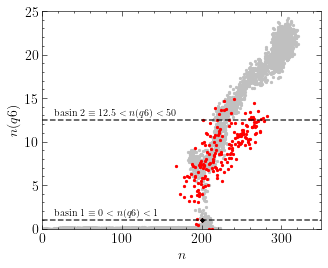

In [7]:
fig, ax = plt.subplots()
#Reference data in grey
ax.scatter(ref_data[:, 0], ref_data[:, 1], s=5, c='silver' )
#New data in red
ax.scatter(DataConc[:, 0], DataConc[:, 1], s=5, c='red' )
#Initial configuration
ax.scatter(DataConc_ic[:, 0], DataConc_ic[:, 1], s=5, c='black' )
#Other specifications
plt.plot(np.linspace(0, 350), np.linspace(1, 1), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot(np.linspace(0, 350), np.linspace(12.5, 12.5), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(15,1.5,'basin $1 \equiv 0< n(q6) < 1$',c='k', fontsize=10)
plt.text(15,13,'basin $2 \equiv 12.5< n(q6) < 50$',c='k', fontsize=10)
ax.set_xlim(0, 350);
ax.set_ylim(0, 25);
ax.set_xlabel('$n$');
ax.set_ylabel('$n(q6)$');
plt.savefig(storing_path+"basin1_1_1.png", dpi=600, bbox_inches='tight')

In [8]:
#Specify loading_path appropriately
#Load sampled data using basin 1 ranging from 0 to 1 (this time, the locally post-processed one)
loading_path = "all_data/basin_0_1_locally_sampled"

In [9]:
data = []
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/cn.*.dat"
    for file in glob.glob(pathname):
        print("loading file:",file)   
        #Load n nq6 data
        inp = np.loadtxt(file,usecols = (1,2), skiprows=0)
        data.append(inp)
#Data concatenated
DataConc=np.concatenate(data)

directory all_data/basin_0_1_locally_sampled
loading file: all_data/basin_0_1_locally_sampled/cn.8.dat
loading file: all_data/basin_0_1_locally_sampled/cn.9.dat
loading file: all_data/basin_0_1_locally_sampled/cn.19.dat
loading file: all_data/basin_0_1_locally_sampled/cn.25.dat
loading file: all_data/basin_0_1_locally_sampled/cn.24.dat
loading file: all_data/basin_0_1_locally_sampled/cn.18.dat
loading file: all_data/basin_0_1_locally_sampled/cn.23.dat
loading file: all_data/basin_0_1_locally_sampled/cn.22.dat
loading file: all_data/basin_0_1_locally_sampled/cn.20.dat
loading file: all_data/basin_0_1_locally_sampled/cn.21.dat
loading file: all_data/basin_0_1_locally_sampled/cn.10.dat
loading file: all_data/basin_0_1_locally_sampled/cn.11.dat
loading file: all_data/basin_0_1_locally_sampled/cn.13.dat
loading file: all_data/basin_0_1_locally_sampled/cn.12.dat
loading file: all_data/basin_0_1_locally_sampled/cn.16.dat
loading file: all_data/basin_0_1_locally_sampled/cn.17.dat
loading file:

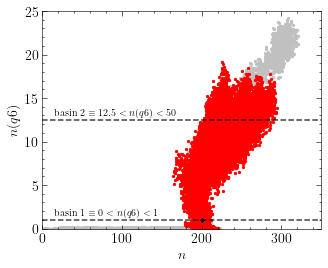

In [10]:
fig, ax = plt.subplots()
#Reference data in grey
ax.scatter(ref_data[:, 0], ref_data[:, 1], s=5, c='silver' )
#New data in red
ax.scatter(DataConc[:, 0], DataConc[:, 1], s=5, c='red' )
#Initial configuration
ax.scatter(DataConc_ic[:, 0], DataConc_ic[:, 1], s=5, c='black' )
#Other specifications
plt.plot(np.linspace(0, 350), np.linspace(1, 1), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot(np.linspace(0, 350), np.linspace(12.5, 12.5), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(15,1.5,'basin $1 \equiv 0< n(q6) < 1$',c='k', fontsize=10)
plt.text(15,13,'basin $2 \equiv 12.5< n(q6) < 50$',c='k', fontsize=10)
ax.set_xlim(0, 350);
ax.set_ylim(0, 25);
ax.set_xlabel('$n$');
ax.set_ylabel('$n(q6)$');
plt.savefig(storing_path+"basin1_1_2.png", dpi=600, bbox_inches='tight')

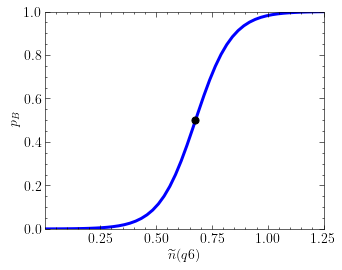

In [11]:
fig, ax = plt.subplots()
#Qualitative plot for illustrative purposes
other_y = np.array([0, 0.0, 0.0, 0.5, 0.75, 1, 1] )
other_x = np.array([0, 0.2, 0.5, 0.65, 0.8, 1,  1.25] )
ax.set_xlabel('$\widetilde{n}(q6)$');
ax.set_ylabel('$p_B$');
#Define sigmoid
def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y
xdata = np.sort(other_x)
ydata = np.sort(other_y)
#Sigmoid fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
x = np.linspace(0.0, 1.25, 50)
y = sigmoid(x, *popt)
pylab.plot(x,y, label='fit', c='blue', linewidth=3, zorder=1)
pylab.scatter(0.676, 0.5, s=50, c='k', zorder=2) 
ax.set_xlim(0.0001, 1.25);
ax.set_ylim(0, 1);
plt.savefig(storing_path+"committor_basin1_1_1.png", dpi=600, bbox_inches='tight')

In [12]:
#Specify loading_path appropriately
#Load probabilities obtained using basin 1 ranging from 0 to 1
loading_path = "all_data/basin_0_1_probabilities"

In [13]:
data= []
root_pow = 1/3
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/prob-basin-*"
    for file in glob.glob(pathname):
        print("loading file:",file)  
        #Load probabilities and nq6 initial values
        inp = np.loadtxt(file, usecols=(1,2), skiprows=0)
        data.append(np.power([inp], root_pow))
# Data concatenated
DataConc=np.concatenate(data)

directory all_data/basin_0_1_probabilities
loading file: all_data/basin_0_1_probabilities/prob-basin-7635000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7650000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7649000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7651000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7648000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7630000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7646000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7644000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7640000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7645000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7647000-25
loading file: all_data/basin_0_1_probabilities/prob-basin-7639000-25


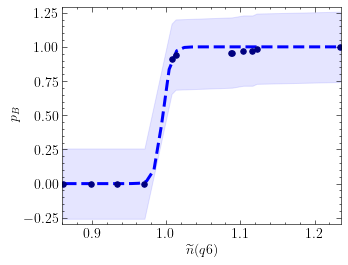

In [14]:
fig, ax = plt.subplots()
#Plot probabilities as a function of nq6 initial values
ax.scatter(np.sort(DataConc[:,1]), np.sort(DataConc[:,0]), s=30, c='navy', zorder=2) 
ax.set_xlabel('$\widetilde{n}(q6)$');
ax.set_ylabel('$p_B$');
xdata = np.sort(DataConc[:,1])
ydata = np.sort(DataConc[:,0])
popt, pcov = curve_fit(sigmoid, xdata, ydata)
x = np.linspace(0.8, 1.3, 50)
y = sigmoid(x, *popt)
#95% confidence interval
ci = 1.96 * np.std(np.sort(DataConc[:,0]))/np.sqrt(len(np.sort(DataConc[:,1])))
ax.fill_between(np.sort(DataConc[:,1]), (np.sort(DataConc[:,0])-ci), (np.sort(DataConc[:,0])+ci), color='b', alpha=.1)
#Other specifications
pylab.plot(x,y, c='blue', linewidth=3, linestyle='dashed', zorder=1)
ax.set_xlim(0.86, 1.236);
ax.set_ylim(-0.295, 1.295);
plt.savefig(storing_path+"committor_basin1_1_2.png", dpi=600, bbox_inches='tight')

**Plots defining basin 1 ranging from 0 to 0.2**

In [15]:
#Specify loading_path appropriately
#Load sampled data using basin 1 ranging from 0 to 0.2 (this time, the locally post-processed one)
loading_path = "all_data/basin_0_02_locally_sampled"

In [16]:
data = []
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/cn.*.dat"
    for file in glob.glob(pathname):
        print("loading file:",file)   
        #Load n nq6 data
        inp = np.loadtxt(file,usecols = (1,2), skiprows=0)
        data.append(inp)
#Data concatenated
DataConc=np.concatenate(data)

directory all_data/basin_0_02_locally_sampled
loading file: all_data/basin_0_02_locally_sampled/cn.8.dat
loading file: all_data/basin_0_02_locally_sampled/cn.7.dat
loading file: all_data/basin_0_02_locally_sampled/cn.6.dat
loading file: all_data/basin_0_02_locally_sampled/cn.4.dat
loading file: all_data/basin_0_02_locally_sampled/cn.5.dat
loading file: all_data/basin_0_02_locally_sampled/cn.1.dat
loading file: all_data/basin_0_02_locally_sampled/cn.2.dat
loading file: all_data/basin_0_02_locally_sampled/cn.3.dat


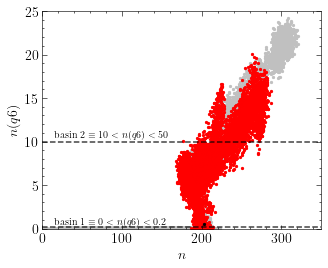

In [17]:
fig, ax = plt.subplots()
#Reference data in grey
ax.scatter(ref_data[:, 0], ref_data[:, 1], s=5, c='silver' )
#New data in red
ax.scatter(DataConc[:, 0], DataConc[:, 1], s=5, c='red' )
#Initial configuration (from reading file)
ax.scatter(203.300321, 0.502688, s=5, c='black' )
#Other specifications
plt.plot(np.linspace(0, 350), np.linspace(0.2, 0.2), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot(np.linspace(0, 350), np.linspace(10, 10), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(15,0.5,'basin $1 \equiv 0< n(q6) < 0.2$',c='k', fontsize=10)
plt.text(15,10.5,'basin $2 \equiv 10< n(q6) < 50$',c='k', fontsize=10)
ax.set_xlim(0, 350);
ax.set_ylim(0, 25);
ax.set_xlabel('$n$');
ax.set_ylabel('$n(q6)$');
plt.savefig(storing_path+"basin02_1_2.png", dpi=600, bbox_inches='tight')

In [18]:
#Specify loading_path appropriately
#Load probabilities obtained using basin 1 ranging from 0 to 0.2
loading_path = "all_data/basin_0_02_probabilities"

In [19]:
data= []
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/prob-basin-*"
    for file in glob.glob(pathname):
        print("loading file:",file)   
        #Load n nq6 data
        inp = np.loadtxt(file, usecols=(1,2), skiprows=0)
        data.append(np.power([inp], root_pow))
#Data concatenated
DataConc=np.concatenate(data)

directory all_data/basin_0_02_probabilities
loading file: all_data/basin_0_02_probabilities/prob-basin-7637000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7635000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7632000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7630000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7625000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7627000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7642000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7640000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7600000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7645000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7599000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7620000-15
loading file: all_data/basin_0_02_probabilities/prob-basin-7622000-15


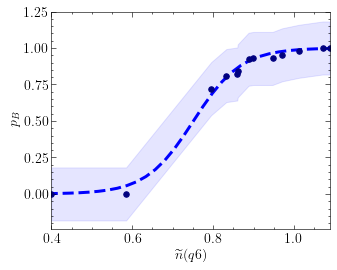

In [20]:
fig, ax = plt.subplots()
#Plot probabilities as a function of nq6 initial values
ax.scatter(np.sort(DataConc[:,1]), np.sort(DataConc[:,0]), s=30, c='navy', zorder=2) 
#95% confidence interval
ci = 1.96 * np.std(np.sort(DataConc[:,0]))/np.sqrt(len(np.sort(DataConc[:,1])))
ax.fill_between(np.sort(DataConc[:,1]), (np.sort(DataConc[:,0])-ci), (np.sort(DataConc[:,0])+ci), color='b', alpha=.1)
#Other specifications
ax.set_xlabel('$\widetilde{n}(q6)$');
ax.set_ylabel('$p_B$');
xdata = np.sort(DataConc[:,1])
ydata = np.sort(DataConc[:,0])
popt, pcov = curve_fit(sigmoid, xdata, ydata)
x = np.linspace(0.0, 1.15, 50)
y = sigmoid(x, *popt)
pylab.plot(x,y, c='blue', linewidth=3, linestyle='dashed', zorder=1)
ax.set_xlim(0.4, 1.09);
ax.set_ylim(-0.24, 1.25);
plt.savefig(storing_path+"committor_basin02.png", dpi=600, bbox_inches='tight')

**Plots all sampling combined**

In [21]:
#Specify loading_path appropriately
#Load all sampled data
loading_path = "all_data/basin_0_02_all_locally_sampled"

In [22]:
data = []
data_ic = []
#Loop through the directories containing the paths
for directory in glob.glob(loading_path,recursive=True):
    print("directory",directory)
    #Loop through the paths
    pathname=directory+"/cn.*_*.dat"
    for file in glob.glob(pathname):
        print("loading file:",file)   
        #Load n nq6 data
        inp = np.loadtxt(file,usecols = (1,2), skiprows=0)
        inp2 = inp[:1] #initial configurations
        data.append(inp)
        data_ic.append(inp2) #initial configurations
#Data concatenated
DataConc=np.concatenate(data)
DataConc_ic=np.concatenate(data_ic) #initial configurations

directory all_data/basin_0_02_all_locally_sampled
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7625000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.8_7625000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.4_7625000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.9_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.1_7625000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.1_7622000_s2.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7630000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7643000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.6_7620000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7620000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.3_7643000.dat
loading file: all_data/basin_0_02_all_locally_sampled/cn.5_7625000_s2.dat
loading f

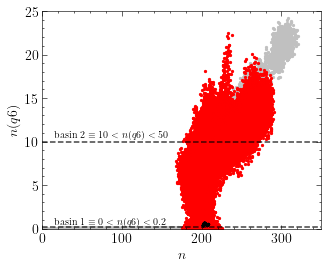

In [23]:
fig, ax = plt.subplots()
#Reference data in grey
ax.scatter(ref_data[:, 0], ref_data[:, 1], s=5, c='silver' )
#New data in red
ax.scatter(DataConc[:, 0], DataConc[:, 1], s=5, c='red' )
#Initial configurations
ax.scatter(DataConc_ic[:, 0], DataConc_ic[:, 1], s=5, c='black' )
#Other specifications
plt.plot( np.linspace(0, 350), np.linspace(0.2, 0.2), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot( np.linspace(0, 350), np.linspace(10, 10), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(15,0.5,'basin $1 \equiv 0< n(q6) < 0.2$',c='k', fontsize=10)
plt.text(15,10.5,'basin $2 \equiv 10< n(q6) < 50$',c='k', fontsize=10)
ax.set_xlim(0, 350);
ax.set_ylim(0, 25);
ax.set_xlabel('$n$');
ax.set_ylabel('$n(q6)$');
plt.savefig(storing_path+"all_data_1_1.png", dpi=600, bbox_inches='tight')

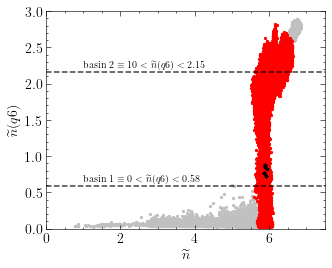

In [24]:
root_pow = 1/3
fig, ax = plt.subplots()
#Reference data in grey
ax.scatter(np.power(ref_data[:, 0], root_pow), np.power(ref_data[:, 1], root_pow), s=5, c='silver' )
#New data in red
ax.scatter(np.power(DataConc[:, 0], root_pow), np.power(DataConc[:, 1], root_pow), s=5, c='red' )
#Initial configurations
ax.scatter(np.power(DataConc_ic[:, 0], root_pow), np.power(DataConc_ic[:, 1], root_pow), s=5, c='black' )
#Other specifications
plt.plot( np.linspace(0, 7.5), np.linspace(0.5848035476, 0.5848035476), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.plot( np.linspace(0, 7.5), np.linspace(2.15443469, 2.15443469), c='black', linestyle='--', linewidth=1.5, alpha=0.75)
plt.text(1,0.6448035476,'basin $1 \equiv 0< \widetilde{n}(q6) < 0.58$',c='k', fontsize=10)
plt.text(1,2.21443469,'basin $2 \equiv 10< \widetilde{n}(q6) < 2.15$',c='k', fontsize=10)
ax.set_xlim(0, 7.5);
ax.set_ylim(0, 3);
ax.set_xlabel('$\widetilde{n}$');
ax.set_ylabel('$\widetilde{n}(q6)$');
plt.savefig(storing_path+"all_data_1_2.png", dpi=600, bbox_inches='tight')